## Signaling Schemes with Memory

Signaling schemes with memory can be explained in terms of Markov chains and finite-state machines. The state transition and the outputs of the Markov chain are governed by:

$$
m_{\ell} = f_m(S_{\ell-1}, I_{\ell})
$$

$$
S_{\ell} = f_s(S_{\ell-1}, I_{\ell})
$$

where 
- $I_{\ell}$ denotes the information sequence
- $m_{\ell}$ is the index of the transmitted signal $s_{m_{\ell}}(t)$.


### Baseband Signals and Data Sequences

We focus on two key signals:

- NRZ (Non-Return-to-Zero) Signal
- NRZI (Non-Return-to-Zero Inverted) Signal


### NRZ Signal

- The simplest form of baseband signaling.
- A binary **1** is represented by a rectangular pulse with polarity $ +A $.
- A binary **0** is represented by a rectangular pulse with polarity $ -A $.
- The NRZ modulator is **memoryless**, which means the output depends only on the current bit and not on past bits.
- This encoding is equivalent to:
  - Binary Pulse Amplitude Modulation (PAM)
  - Binary Phase Shift Keying (BPSK) in carrier-modulated systems.

### NRZI Signal

- The NRZI signal differs from the NRZ signal in how transitions occur.
- A **transition (change in amplitude)** happens only when the information bit is **1**.
- If the bit is **0**, the signal amplitude remains unchanged.
- This encoding is known as **differential encoding**.

#### Differential Encoding 

The relationship for NRZI encoding is given by:

$$
b_k = a_k \oplus b_{k-1}
$$

where:

- $ \{a_k\} $: Input binary information sequence.
- $ \{b_k\} $: Output sequence of the differential encoder.
- $ \oplus $: Addition modulo 2 (XOR operation).

#### XOR 

The **XOR (exclusive OR) truth table** follows these rules:

- The output is **true (1)** if **only one** of the inputs is true.
- The output is **false (0)** if **both inputs are the same** (either both 0 or both 1).

The Truth Table for XOR:

| A | B | A $\oplus$ B (XOR) |
|---|---|------------|
| 0 | 0 | 0          |
| 0 | 1 | 1          |
| 1 | 0 | 1          |
| 1 | 1 | 0          |

We can see that:
- $ b_k = 1 $ if the input bit $ a_k $ differs from the previous encoded bit $ b_{k-1} $.
- $ b_k = 0 $ if they are the same.


**Signal Representation**

- If $ b_k = 1 $: A rectangular pulse with amplitude $ +A $ is transmitted.
- If $ b_k = 0 $: A rectangular pulse with amplitude $ -A $ is transmitted.

Thus, **NRZI signaling** can be seen as applying a **differential encoder** followed by an **NRZ signaling scheme**.


In summary:
- NRZ is **memoryless**, depending only on the current bit.
- NRZI introduces **memory** through **differential encoding**, which makes signal transitions convey information rather than amplitude levels.

### Miller Coding
In the following simulation, the original binary data is represented using **Miller coding**, i.e.:
  - **Bit 1**: A transition occurs in the middle of the bit interval.
  - **Bit 0**: No transition if the previous bit was 0; otherwise, a transition at the beginning.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample binary data sequence
data = np.array([1, 0, 1, 1, 0, 0, 1, 0])

In [3]:
# Generate NRZI signal using transition-based method with output bits
def generate_nrzi(data, amplitude=1):
    nrzi_signal = []
    output_bits = []
    current_level = -1  # Start with -1 amplitude for first bit (assumption)
    b_prev = 0
    for bit in data:
        if bit == 1:
            current_level = -current_level  # Toggle the level when bit is 1
        nrzi_signal.extend([current_level] * 100)
        b_current = 1 if current_level == amplitude else 0
        output_bits.append(b_current)
    return np.array(nrzi_signal), output_bits

# Generate Miller-coded signal with output bits
def generate_miller_code(data, amplitude=1):
    miller_signal = []
    output_bits = []
    current_level = amplitude
    for bit in data:
        if bit == 1:
            # For bit 1: transition occurs in the middle of the bit interval
            half_bit = [current_level] * 50 + [-current_level] * 50
            current_level = -current_level
            output_bits.append(1)
        else:
            # For bit 0: no transition if previous bit was 0, transition at the start if previous bit was 1
            half_bit = [current_level] * 100
            output_bits.append(0)
        miller_signal.extend(half_bit)
    return np.array(miller_signal), output_bits

# Generate NRZ signal with output bits
def generate_nrz(data, amplitude=1):
    nrz_signal = np.repeat(data * 2 - 1, 100)  # Convert 1->+1, 0->-1, each bit lasts 100 samples
    output_bits = data.tolist()  # NRZ output bits match input bits directly
    return nrz_signal, output_bits

# NRZI signal generation using XOR as defined by b_k = a_k ⊕ b_{k-1}
def generate_nrzi_xor(data, amplitude=1):
    nrzi_signal = []
    b_prev = 0  # Initialize with 0 as the initial condition for b_{k-1}
    output_bits = []
    for bit in data:
        b_current = bit ^ b_prev  # XOR operation: b_k = a_k ⊕ b_{k-1}
        current_level = amplitude if b_current == 1 else -amplitude
        nrzi_signal.extend([current_level] * 100)
        b_prev = b_current
        output_bits.append(b_current)
    return np.array(nrzi_signal), output_bits

# Generate signals with output bits
miller_signal, miller_output_bits = generate_miller_code(data)
nrz_signal, nrz_output_bits = generate_nrz(data)
nrzi_signal, nrzi_output_bits = generate_nrzi(data)
nrzi_signal_xor, nrzi_xor_output_bits = generate_nrzi_xor(data)

# Display the output bit sequences for all methods
print("Original Data:", data.tolist())
print("Miller Output Bits:", miller_output_bits)
print("NRZ Output Bits:", nrz_output_bits)
print("NRZI Output Bits (Transition-Based Method):", nrzi_output_bits)
print("NRZI Output Bits (XOR Method):", nrzi_xor_output_bits)


Original Data: [1, 0, 1, 1, 0, 0, 1, 0]
Miller Output Bits: [1, 0, 1, 1, 0, 0, 1, 0]
NRZ Output Bits: [1, 0, 1, 1, 0, 0, 1, 0]
NRZI Output Bits (Transition-Based Method): [1, 1, 0, 1, 1, 1, 0, 0]
NRZI Output Bits (XOR Method): [1, 1, 0, 1, 1, 1, 0, 0]


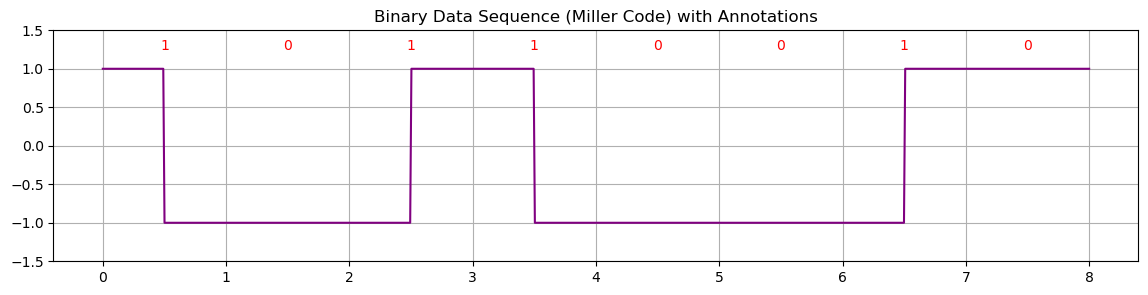

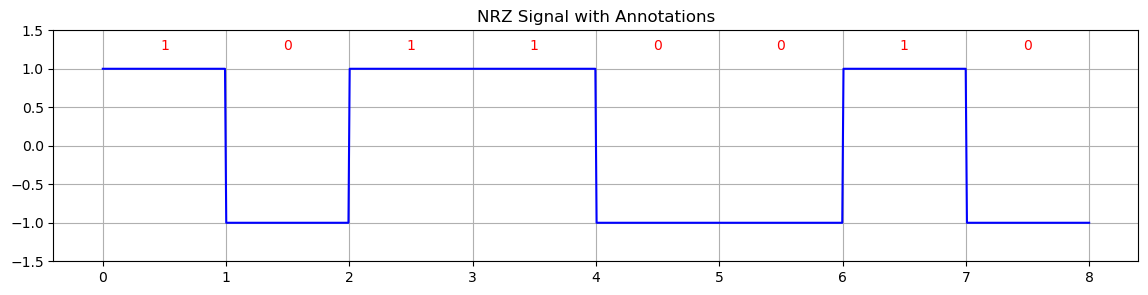

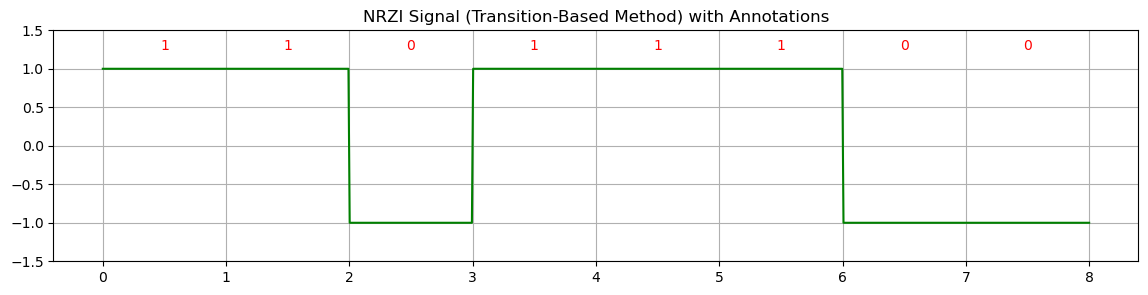

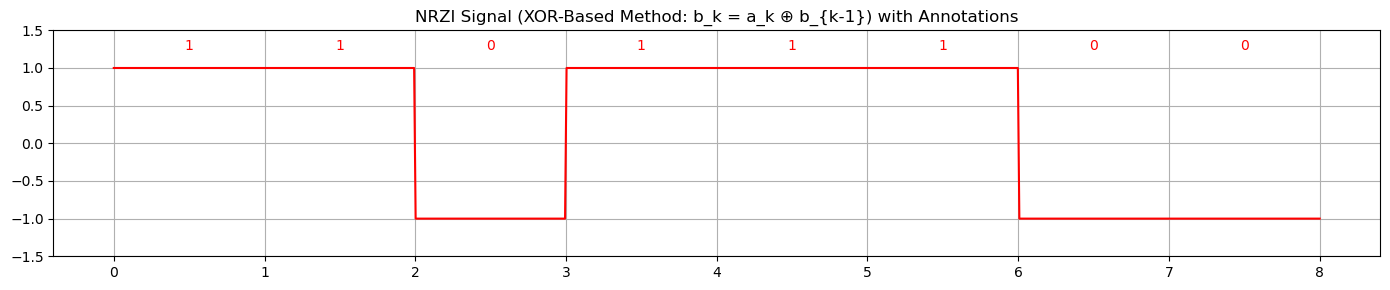

In [4]:
# Time axis for visualization
time = np.linspace(0, len(data), len(miller_signal))

# Plot binary data using Miller code
plt.figure(figsize=(14, 3))
plt.plot(time, miller_signal, color='purple')
plt.title('Binary Data Sequence (Miller Code) with Annotations')
plt.ylim(-1.5, 1.5)
plt.grid(True)

# Annotate each bit on the binary data plot
for i, bit in enumerate(data):
    plt.text(i + 0.5, 1.2, str(bit), ha='center', va='bottom', fontsize=10, color='red')

# Plot NRZ signal with annotations
plt.figure(figsize=(14, 3))
plt.plot(time, nrz_signal, color='blue')
plt.title('NRZ Signal with Annotations')
plt.ylim(-1.5, 1.5)
plt.grid(True)
for i, bit in enumerate(nrz_output_bits):
    plt.text(i + 0.5, 1.2, str(bit), ha='center', va='bottom', fontsize=10, color='red')

# Plot NRZI signal (transition-based method) with annotations
plt.figure(figsize=(14, 3))
plt.plot(time, nrzi_signal, color='green')
plt.title('NRZI Signal (Transition-Based Method) with Annotations')
plt.ylim(-1.5, 1.5)
plt.grid(True)
for i, bit in enumerate(nrzi_output_bits):
    plt.text(i + 0.5, 1.2, str(bit), ha='center', va='bottom', fontsize=10, color='red')

# Plot NRZI signal (XOR-based method) with annotations
plt.figure(figsize=(14, 3))
plt.plot(time, nrzi_signal_xor, color='red')
plt.title('NRZI Signal (XOR-Based Method: b_k = a_k ⊕ b_{k-1}) with Annotations')
plt.ylim(-1.5, 1.5)
plt.grid(True)
for i, bit in enumerate(nrzi_xor_output_bits):
    plt.text(i + 0.5, 1.2, str(bit), ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()


| Step | Input $ a_k $ | Previous NRZI bit $ b_{k-1} $ | XOR Operation $ b_k = a_k \oplus b_{k-1} $ | NRZI Output $ b_k $ |
|------|----------------|--------------------------|---------------------------------|------------------|
| 1    | 1              | 0 (assumption)                       | $1 \oplus 0$                  | 1              |
| 2    | 0              | 1                        | $0 \oplus 1$                  | 1              |
| 3    | 1              | 1                        | $1 \oplus 1$                  | 0              |
| 4    | 1              | 0                        | $1 \oplus 0$                  | 1              |
| 5        | 0              | 1                        | $0 \oplus 1$           | 1                  |
| 6        | 0              | 1                        | $0 \oplus 1$           | 1                  |
| 7        | 1              | 1                        | $1 \oplus 1$           | 0                  |
| 8        | 0              | 0                        | $0 \oplus 0$           | 0                  |


### Memory in NRZI Signaling

The presence of the **differential encoder** introduces **memory** into the NRZI signaling process. Unlike the **memoryless NRZ**, the state of the signal in NRZI depends on both the current bit and the previous state, forming a **Markov chain**.

#### Markov Chain Representation

Since the information sequence is binary, the Markov chain has **two states**, typically representing the states corresponding to binary **0** and **1**.

The transition probabilities between these states are governed by the binary source generating **0s** and **1s**.

- When the source is **equiprobable** (equal likelihood of generating **0** or **1**):

$$
P = 
\begin{pmatrix}
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
$$

This matrix describes the probability of transitioning from one state to another.  
- Each row sums to **1**, indicating valid probability distributions.


#### Steady-State Probability Distribution

The **steady-state probability distribution** $ \mathbf{p} $ represents the long-term probabilities of being in each state.

For the **equiprobable case**, the steady-state distribution is:

$$
\mathbf{p} = 
\begin{pmatrix}
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
$$

When the binary source is equiprobable, the steady-state probabilities are symmetric.
This means that, in the long run, the system is equally likely to be in either of the two states.

#### Generalized Transition Probability Matrix

If the binary source is not equiprobable, i.e., the probability of generating **1s** is 

$$
\boxed{P[a_k = 1] = 1 - P[a_k = 0] = p} 
$$ 

The transition probability matrix becomes:

$$
P = 
\begin{pmatrix}
1 - p & p \\
p & 1 - p
\end{pmatrix}
$$

The probability parameter $ p $ allows modeling of **biased sources**.

The steady-state probabilities are essential for calculating the **power spectral density (PSD)** of modulation schemes with memory, such as NRZI, and for constructing a **trellis diagram** that visualizes time-evolving state transitions.


![](Figures/fig_com_c2_s9_1.png)



### State Transition Diagram

This diagram shows the **two states** $ S_0 $ and $ S_1 $, corresponding to the possible output states of the **differential encoder** in NRZI signaling.

- $ S_0 = 0 $: The current encoded bit $ b_k = 0 $.  
- $ S_1 = 1 $: The current encoded bit $ b_k = 1 $.

**Transition Labels:**

Each arrow between states is labeled with two components:

$$
\text{Input bit / Output signal}
$$

- **Input bit (0 or 1)**: The binary information bit $ a_k $ that controls the transition.  
- **Output signal (s(t) or -s(t))**: The modulated output waveform transmitted after the encoding operation.

**Interpreting the Labels**

- **0/-s(t)**: Input bit **0** results in the output signal **-s(t)**.  
- **1/s(t)**: Input bit **1** results in the output signal **s(t)**.

The signal polarity $ s(t) $ or $ -s(t) $ indicates the **differential nature** of NRZI:

- If the bit is **1**, the output **transitions** to the opposite state.  
- If the bit is **0**, the output remains in the **same state**.


#### **NRZI Transition Given $ S_0 $**
- **$ S_0 $ means the current state corresponds to output $ -s(t) $**.
- The transition depends on the **input bit** $ a_k $:

| **Input $ a_k $** | **Transition** | **Output** | **Probability** |
|-----------------|-----------------|------------|-----------------|
| **0** | No change (remains in $ S_0 $) | $ -s(t) $ | $ 1 - p $ |
| **1** | Flips to $ S_1 $ | $ s(t) $ | $ p $ |

**Notation Interpretation: $ 1 / -s(t), \quad (1 - p) $**
- The input bit **is 0**.
- The output remains at **$ -s(t) $** (no transition).
- This happens with **probability $ 1 - p $**.

#### **NRZI Transition Given $ S_1 $**

- **$ S_1 $ means the current state corresponds to output $ s(t) $**.
- The transition depends on the **input bit** $ a_k $:

| **Input $ a_k $** | **Transition** | **Output** | **Probability** |
|-----------------|-----------------|------------|-----------------|
| **0** | No change (remains in $ S_1 $) | $ s(t) $ | $ 1 - p $ |
| **1** | Flips to $ S_0 $ | $ -s(t) $ | $ p $ |

**Notation Interpretation $ 0 / s(t), \quad (1 - p) $**  
- The input bit **is 0**.
- The output **remains $ s(t) $** (no transition).
- This happens with **probability $ 1 - p $**.


### Trellis Diagram

The trellis diagram extends the state transition logic over time, showing how the states evolve with each successive input bit.

- The **horizontal axis** represents time, advancing **one bit period** at each step.  
- The **vertical axis** represents the **state of the encoder** ($ S_0 $ or $ S_1 $).  
- The **lines between nodes** represent possible transitions and are labeled similarly to the state diagram.

**Trellis Paths**

The labels **0/-s(t)** and **1/s(t)** follow the pattern:

- Moving **horizontally** (staying in the same state) corresponds to a **0** bit.  
- Moving **diagonally** (switching between $ S_0 $ and $ S_1 $) corresponds to a **1** bit.

Moreover, each edge is now labeled with:

$$
\text{Input bit / Output signal / Output bit (b)}
$$

- **Input bit**: The incoming binary data bit ($ a_k $) that triggers the state transition.
- **Output signal**: $ s(t) $ or $ -s(t) $, representing the modulated waveform produced.
- **Output bit (b)**: The encoded bit $ b_k $, generated using the formula $
b_k = a_k \oplus b_{k-1}
$

- **Edges**:  
  - **0/-s(t)/b=0** → Input bit **0**, output signal **-s(t)**, output bit **0**.  
  - **1/s(t)/b=1** → Input bit **1**, output signal **s(t)**, output bit **1**.

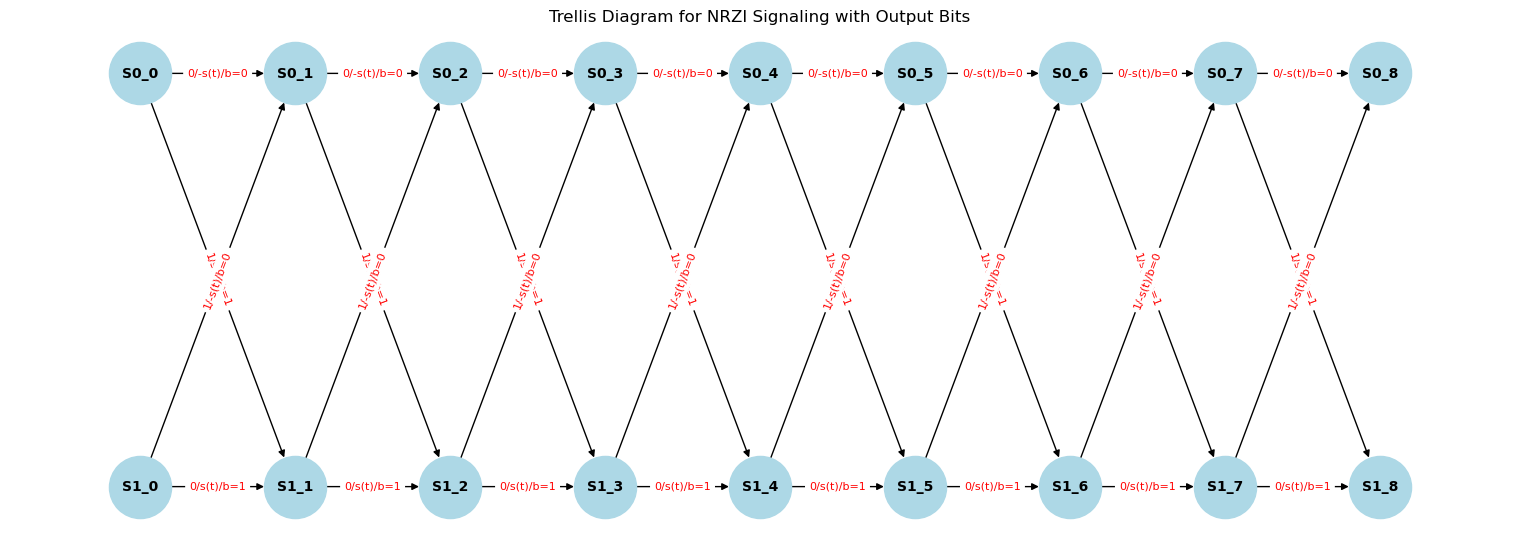

In [5]:
import networkx as nx

def plot_corrected_nrzi_trellis_with_output(data, nrzi_signal):
    # Create a directed graph for the trellis diagram with output bits
    G = nx.DiGraph()
    states = ['S0', 'S1']
    time_steps = len(data) + 1

    # Add nodes and positions
    pos = {}
    for t in range(time_steps):
        for i, state in enumerate(states):
            node = f"{state}_{t}"
            G.add_node(node, label=state)
            pos[node] = (t, -i)

    # Add edges with bits and output labels
    for t in range(time_steps - 1):
        for i, state_from in enumerate(states):
            node_from = f"{state_from}_{t}"
            for j, state_to in enumerate(states):
                node_to = f"{state_to}_{t+1}"
                input_bit = 1 if state_from != state_to else 0

                # Determine initial previous bit based on the starting node
                prev_bit = 0 if state_from == "S0" else 1

                # Determine output bit based on NRZI rule
                b_current = input_bit ^ prev_bit

                output_signal = "s(t)" if b_current == 1 else "-s(t)"
                label = f"{input_bit}/{output_signal}/b={b_current}"
                G.add_edge(node_from, node_to, label=label, label_pos=0.01)

    # Draw the graph
    plt.figure(figsize=(15, 5))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

    # Draw edge labels with bits
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="red")

    plt.title("Trellis Diagram for NRZI Signaling with Output Bits")
    plt.show()

# Generate and plot the corrected NRZI trellis diagram with output bits
plot_corrected_nrzi_trellis_with_output(data, nrzi_signal)


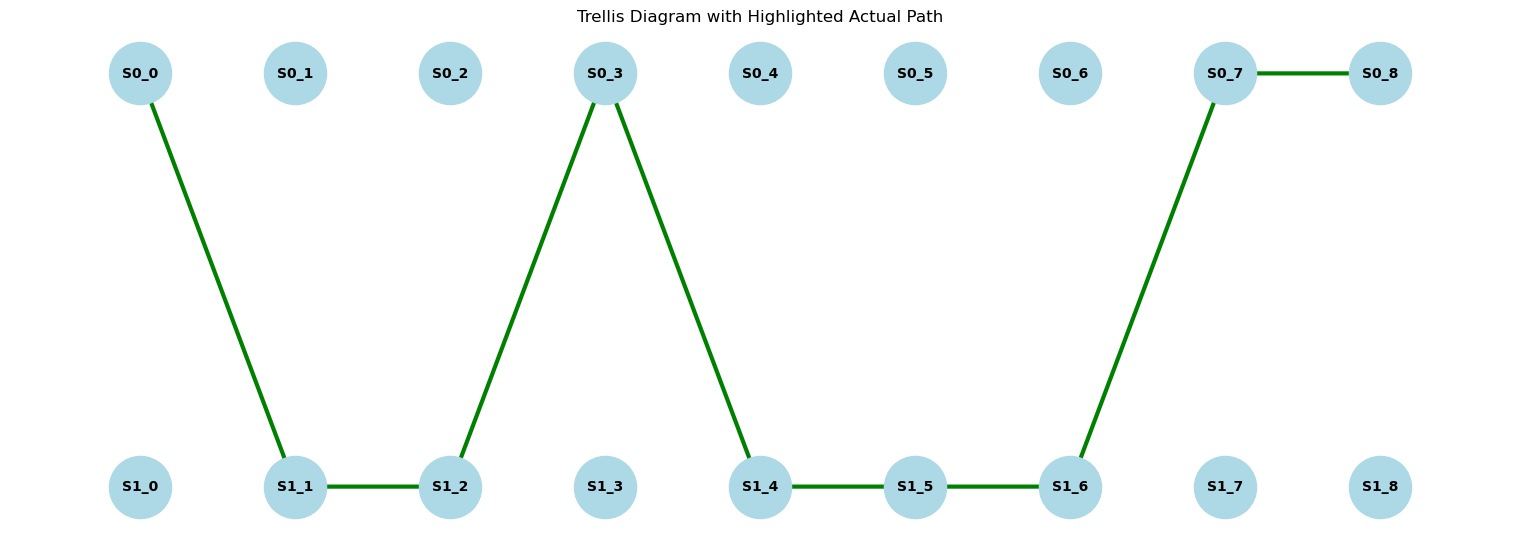

In [6]:
def plot_trellis_with_highlighted_path_only(data):
    # Create a directed graph for the trellis diagram
    G = nx.DiGraph()
    states = ['S0', 'S1']
    time_steps = len(data) + 1

    # Add nodes and positions
    pos = {}
    for t in range(time_steps):
        for i, state in enumerate(states):
            node = f"{state}_{t}"
            G.add_node(node, label=state)
            pos[node] = (t, -i)

    # Determine the actual path based on the NRZI rule
    b_prev = 0
    path_nodes = ["S0_0"]
    current_state = "S0"
    for t, bit in enumerate(data):
        b_current = bit ^ b_prev  # Calculate NRZI output bit
        b_prev = b_current
        next_state = "S1" if b_current == 1 else "S0"
        path_nodes.append(f"{next_state}_{t+1}")

    # Draw the graph with nodes
    plt.figure(figsize=(15, 5))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)

    # Highlight the actual path in green
    path_edges = [(path_nodes[i], path_nodes[i + 1]) for i in range(len(path_nodes) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="green")

    plt.title("Trellis Diagram with Highlighted Actual Path")
    plt.show()


# Plot the trellis diagram with the highlighted actual path only
plot_trellis_with_highlighted_path_only(data)



In [7]:
def get_nrzi_path_and_output_sequence(data):
    # Initialize variables
    path_nodes = ["S0_0"]  # Start from initial state S0_0
    current_state = "S0"
    b_prev = 0
    output_sequence = []

    # Generate the path and output bits based on the input data
    for t, input_bit in enumerate(data):
        # Calculate output bit using NRZI rule
        b_current = input_bit ^ b_prev
        b_prev = b_current

        # Determine the next state
        next_state = "S1" if b_current == 1 else "S0"
        next_node = f"{next_state}_{t+1}"
        path_nodes.append(next_node)

        # Add the output bit to the sequence
        output_sequence.append(b_current)

    return path_nodes, output_sequence

# Get the path and output sequence
path_nodes, output_sequence = get_nrzi_path_and_output_sequence(data)

# Print the results
print("Data:", data)
print("Path Nodes:", path_nodes)
print("Output Sequence:", output_sequence)


Data: [1 0 1 1 0 0 1 0]
Path Nodes: ['S0_0', 'S1_1', 'S1_2', 'S0_3', 'S1_4', 'S1_5', 'S1_6', 'S0_7', 'S0_8']
Output Sequence: [1, 1, 0, 1, 1, 1, 0, 0]


### Sequence of Waveforms Representation

Let $ d(t) $ be a **time-domain representation of a symbol stream**.

Let function $g(t)$ be a certain **basic modulation pulse**. 

We define a waveform:

$$
\boxed{
d(t) = \sum_{n} I_n g(t - nT)
}
$$

where:
- Each term $I_n$ corresponds to a specific amplitude from a constellation (e.g., $\pm1, \pm3, \ldots$).  
- $g(t)$ is the **baseband pulse shape** used to carry each symbol over time.

The signal $d(t)$ is a **discrete-time representation of a sequence of signals** composed of multiple **successive symbols**.  

#### Waveform Components

##### Recall PAM Waveform

In the lowpass equivalent form, the PAM signals can be written as:

$$
s_{m,lp}(t)
\;=\;
A_m\,g(t),
$$

where:

- $g(t)$ is a real‐valued waveform that **lives near DC** (i.e., it is a baseband signal). 
- $A_m$ are the **same** amplitude levels.


Recall the presence of the function $ g(t) $ in:

- The **lowpass equivalent PAM signal**:  

   $$
   s_{m,lp}(t) = A_m g(t)
   $$

- The **PAM sequence**:  

   $$
   d(t) = \sum_{n} I_n g(t - nT)
   $$

##### Role of $ g(t) $ in $ s_{m,lp}(t) $

It can be considered that: 
- $ s_{m,lp}(t) $ = **one PAM symbol** = amplitude $A_m$ × pulse $g(t)$.  
- **This is a snapshot of a single symbol**, not the entire transmitted signal.

Thus, the $g(t)$ represents the **pulse shape of an individual PAM symbol**.

- $ s_{m,lp}(t) $ corresponds to **one PAM symbol** with amplitude $A_m$.  
- Here, $g(t)$ describes the **shape of a single transmitted pulse**—often used for analyzing or simulating one isolated symbol in baseband form.

**Intuitive Example: The Shape of a Single Note**

We can think of $ g(t) $ as the **sound shape of one musical note**.

- When we play a single piano key, the sound has a specific shape—it starts, sustains, and then fades away.  
- In PAM, $ g(t) $ defines the **pulse shape** of a single symbol, like the waveform of one musical note.

So, when we see:

$$
s_{m,lp}(t) = A_m g(t)
$$

- **$g(t)$**: the "sound envelope" of the note—like how the sound is shaped over time (e.g., rectangular pulse or smoother waveform).  
- **$A_m$**: the "volume" or "intensity" of that note—just like different amplitude levels in PAM.

**Example:**  
- If $ A_m = +3 $ corresponds to a **loud note**, $ g(t) $ shapes how that loud note sounds over time.  
- If $ A_m = -1 $ corresponds to a **softer note**, it uses the **same $g(t)$** shape but with less amplitude.

So, $ s_{m,lp}(t) $ describes **just one note** in the melody.

##### Role of $ d(t) $: The Sequence of Notes (Melody)

Now, when we string together multiple notes, we create a **melody**.

The full PAM signal is like playing a series of musical notes, one after another:

$$
d(t) = \sum_{n} I_n g(t - nT)
$$

This equation describes how each **note $g(t)$** is:

- **Shifted** in time to occur at different time intervals (like playing notes one after the other).  
- **Scaled** by $I_n$ to represent different amplitude levels (like changing volume or pitch to represent different symbols).

So, **$ d(t) $** is like a melody—a sequence of musical notes.  
- Each note has the same shape $ g(t) $ but may have different amplitudes $ I_n $ (like different volumes).  
- Each $ g(t - nT) $ is like playing the note $g(t)$ **after waiting $n$ beats**.

Loosely speaking, we can say that:
- **$ g(t) $** is like the "sound shape" of a single note.  
- **$ s_{m,lp}(t) $** is like **one single note** with a certain amplitude.  
- **$ d(t) $** is like a **full melody**, created by playing these $ g(t) $ "notes" in sequence.

### Example Use Case:
In a **PAM system**, if we use a rectangular pulse $ g(t) $, then:

$$
g(t) = \text{rect}(t/T)
$$

This results in a signal where each symbol is held constant for a duration $ T $, leading to a simple **non-return-to-zero (NRZ)** waveform.

If we use a **raised cosine pulse**, $ g(t) $ provides better spectral properties, reducing inter-symbol interference (ISI).

**Map Binary Data to 4-PAM Symbols ($ I_n $)**  

Using 4-PAM (Pulse Amplitude Modulation), we typically map **2-bit pairs** to amplitude levels.
- A common mapping (Gray coding) is:  

$$
00 \to -3, \quad 01 \to -1, \quad 11 \to 1, \quad 10 \to 3
$$

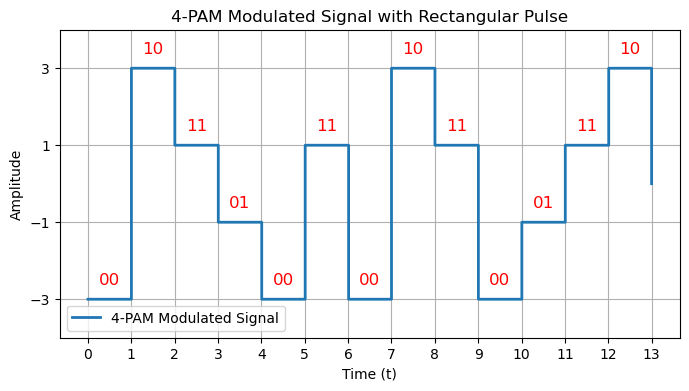

,Binary Pairs,PAM Symbols (I_n)
0,00,-3
1,10,3
2,11,1
3,01,-1
4,00,-3
5,11,1
6,00,-3
7,10,3
8,11,1
9,00,-3


In [8]:
import pandas as pd

# Step 1: Define the binary source sequence
binary_sequence = "00101101001100101100011110"

# Step 2: Convert binary sequence into 2-bit groups for 4-PAM
# Ensure even length by padding if necessary
if len(binary_sequence) % 2 != 0:
    binary_sequence = "0" + binary_sequence  # Pad with leading zero if needed

bit_pairs = [binary_sequence[i:i+2] for i in range(0, len(binary_sequence), 2)]

# Step 3: Map 2-bit pairs to 4-PAM levels
pam_mapping = {
    "00": -3,
    "01": -1,
    "11": 1,
    "10": 3
}
I_n = [pam_mapping[bp] for bp in bit_pairs]  # Mapped sequence

# Step 4: Define signal parameters
T = 1  # Symbol duration
n_symbols = len(I_n)
t_total = n_symbols * T  # Total signal duration

# Define a fine time grid for smooth plotting
t = np.linspace(0, t_total, 1000)

# Step 5: Define the rectangular pulse function g(t)
def g(t):
    """ Rectangular pulse function: g(t) = 1 for 0 <= t < T, else 0. """
    return np.where((0 <= t) & (t < T), 1, 0)

# Step 6: Construct the waveform d(t) using the given equation
d_t = np.zeros_like(t)

for i, I in enumerate(I_n):
    d_t += I * g(t - i * T)  # Shifted rectangular pulses scaled by I_n

# Step 7: Plot the waveform with binary annotations
plt.figure(figsize=(8, 4))
plt.plot(t, d_t, drawstyle="steps-post", linewidth=2, label="4-PAM Modulated Signal")

# Annotate binary bit pairs at each symbol time
for i, (bits, I) in enumerate(zip(bit_pairs, I_n)):
    t_pos = i * T + T / 2  # Midpoint of the symbol duration
    plt.text(t_pos, I + 0.3, f"{bits}", fontsize=12, ha='center', va='bottom', color='red')

# Labels and formatting
plt.xlabel("Time (t)")
plt.ylabel("Amplitude")
plt.title("4-PAM Modulated Signal with Rectangular Pulse")
plt.grid(True)
plt.ylim(-4, 4)
plt.xticks(np.arange(0, t_total + T, T))
plt.yticks(sorted(set(I_n)))
plt.legend()
plt.show()

# Display the binary sequence and the corresponding PAM levels
df = pd.DataFrame({"Binary Pairs": bit_pairs, "PAM Symbols (I_n)": I_n})
df